# Title : Discovery of Materials for Carbon capture

## Motivation:

As we all know that fossil fuels still provide the majority of the world's electricity, and the power generation is the largest emitter of carbon in the entire energy sector. As a major component of the greenhouse gas, the $\text{CO}_\text{2}$ emitted from the combustion of fossil fuels in various industrial processes has caused escalated public concern due to its contribution towards the climate change and environmental pollution. As per Paris Agreement's, the goal is to keep the increase in global average temperature well below 2 $^{\circ}$C to prevent the sea level rise. Today most researchers feel that $\text{CO}_\text{2}$ sequestration is necessary from fossil fuels, and thus the great emphasis is towards the large scale $\text{CO}_\text{2}$ capture technologies.

## Objective : 

The main aim of this study is to find the top performing MOFs which has high $CO_2/N_2$ selectivity but first we have to find the parameters which affect the $CO_2/N_2$ selectivity  in the data. High $CO_2/N_2$ selectivity will ensure good separation of $CO_2$ from the $N_2$ and hence increase the Carbon capture efficiency.
## Methodology:

The data is collected from the **Material archive** which is based on the paper "Data-driven design of metal-organic frameworks for wet flue gas $CO_2$ capture" and data can be found at https://archive.materialscloud.org/record/2018.0016/v3.

Because of the Bias of the data, only 1,50,000 first good data points was selected for further analysis. Firstly, selecting the most appropriate parameters which influences the $CO_2/N_2$ selectivity for the 1,50,000 data points. 
Parameter selection is done by 

**1.)** Correlation analysis between dependent and independent parameters i.e., between Co2/N2 selectivity vs Parameters

**2.)** Then plot of dependent variables wrt independent variables to see if there is any relationship between the parameters.

**3.)** Then Box plot analysis to show the range and outliers in each parameter.

**4.)** then after selecting the best parameters, Regression analysis is done with 20% testing and 80% training data.

**5.)** Regression summary is provided between the best parameters.

**6.)** Multidimensional plot between the 3 best goodness of fit variables is done and seen on the plot.

**7.)** Neural network is done for the above 3 parameter showing low training loss at just 1500 epochs with MSE at 0.06.


In [25]:
import tensorflow as tf

import keras
from keras import initializers
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers


import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

import sys
import os
sys.path.insert(0, '../src/')

%matplotlib inline
import matplotlib.pyplot as plt

from scipy.stats import pearsonr


In [2]:
df = pd.read_csv('all_MOFs_screening_data.csv')

pd.options.display.max_columns = None
display(df)

,MOFname,CO2_uptake_P0.15bar_T298K [mmol/g],CO2_uptake_error_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],heat_adsorption_error_CO2_P0.15bar_T298K [kcal/mol],excess_CO2_uptake_P0.15bar_T298K [mmol/g],CO2_uptake_P0.10bar_T363K [mmol/g],CO2_uptake_error_P0.10bar_T363K [mmol/g],heat_adsorption_CO2_P0.10bar_T363K [kcal/mol],heat_adsorption_error_CO2_P0.10bar_T363K [kcal/mol],excess_CO2_uptake_P0.10bar_T363K [mmol/g],CO2_uptake_P0.70bar_T413K [mmol/g],CO2_uptake_error_P0.70bar_T413K [mmol/g],heat_adsorption_CO2_P0.70bar_T413K [kcal/mol],heat_adsorption_error_CO2_P0.70bar_T413K [kcal/mol],excess_CO2_uptake_P0.70bar_T413K [mmol/g],working_capacity_vacuum_swing [mmol/g],working_capacity_temperature_swing [mmol/g],CO2_binary_uptake_P0.15bar_T298K [mmol/g],CO2_binary_uptake_error_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_binary_P0.15bar_T298K [kcal/mol],heat_adsorption_error_CO2_binary_P0.15bar_T298K [kcal/mol],excess_CO2_binary_uptake_P0.15bar_T298K [mmol/g],N2_binary_uptake_P0.85bar_T298K [mmol/g],N2_binary_uptake_error_P0.85bar_T298K [mmol/g],heat_adsorption_N2_binary_P0.85bar_T298K [kcal/mol],heat_adsorption_error_N2_binary_P0.85bar_T298K [kcal/mol],excess_N2_binary_uptake_P0.85bar_T298K [mmol/g],CO2/N2_selectivity,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],largest_free_sphere_diameter [A],largest_included_sphere_along_free_sphere_path_diameter [A],largest_included_sphere_diameter [A],functional_groups,metal_linker,organic_linker1,organic_linker2,topology
0,str_m5_o16_o16_sra_sym.77,5.955197,0.117622,9.223227,0.546586,5.955127,0.840043,0.295803,7.972884,5.106942,0.840004,1.496286,0.575907,8.155453,5.646149,1.496049,5.115154,4.458911,5.220817,0.226057,9.057156,1.171093,5.220747,0.240941,0.029948,4.978045,1.516875,0.240728,109.786792,2473.186302,1493.011840,613.30,0.14835,0.1480,4.61370,3.78047,4.61370,Pr,9,16,16,sra
1,str_m5_o16_o16_sra_sym.37,5.715251,0.034598,8.391884,0.149962,5.715251,0.901656,0.283054,8.343676,4.785696,0.901656,1.310869,0.504193,7.981700,5.508588,1.310869,4.813595,4.404382,5.286735,0.283150,9.167069,1.464589,5.286735,0.211381,0.026293,5.487318,7.237856,0.211381,126.719639,2419.885159,1444.796800,0.00,0.16099,0.1624,4.10210,3.39756,4.10055,OMe,9,16,16,sra
2,str_m5_o13_o18_sra_sym.149,5.524486,0.155094,8.674098,0.753841,5.524486,0.688965,0.191963,7.546794,3.803472,0.688965,1.210915,0.455165,7.711650,5.180397,1.210915,4.835521,4.313571,5.428172,0.076495,7.547253,0.319204,5.428172,0.194073,0.019983,4.474539,2.182381,0.194073,141.713366,2514.627698,1504.683120,0.00,0.17980,0.1810,4.24711,3.26179,4.24603,NO2,9,13,18,sra
3,str_m5_o2_o18_sra_sym.4,5.517258,0.084320,10.791553,0.514052,5.517258,1.881691,0.166854,9.246778,1.511943,1.881691,2.295509,0.006183,9.461086,0.064854,2.295509,3.635567,3.221749,4.797166,0.114470,9.854624,0.716795,4.797166,0.088480,0.011652,5.051593,2.454686,0.088480,274.702092,2128.612920,1424.810240,0.00,0.10245,0.0922,4.11419,2.93595,3.63925,H,9,2,18,sra
4,str_m5_o16_o16_sra_sym.31,5.451593,0.051989,8.711414,0.260774,5.451476,0.797098,0.254966,8.247735,4.814885,0.797034,1.627107,0.582124,8.482574,5.482311,1.626713,4.654495,3.824486,5.323548,0.161734,9.274585,0.880430,5.323431,0.264817,0.022087,4.881124,0.918682,0.264817,101.853896,2415.251225,1436.905520,1347.04,0.15634,0.1583,4.37077,3.49681,4.16451,Et,9,16,16,sra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324421,str_m2_o10_o18_pcu_sym.111,0.000000,0.000000,NaN,NaN,0.000000,0.000123,0.000004,3.647011,0.206877,0.000123,0.055276,0.003008,NaN,NaN,0.055276,-0.000123,-0.055276,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,949.067112,753.787520,0.00,0.00000,0.0000,3.15041,1.39118,2.95451,Pr,2,10,18,pcu
324422,str_m3_o12_o24_pcu_sym.98,0.000000,0.000000,NaN,NaN,0.000000,0.021932,0.000944,9.212906,0.730794,0.021932,0.066359,0.004848,

In [3]:
df = df.dropna()
df.describe()
#after removal of NaN value we have 319307 data points and we see some infinite values that need to be removed from the data.

,CO2_uptake_P0.15bar_T298K [mmol/g],CO2_uptake_error_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],heat_adsorption_error_CO2_P0.15bar_T298K [kcal/mol],excess_CO2_uptake_P0.15bar_T298K [mmol/g],CO2_uptake_P0.10bar_T363K [mmol/g],CO2_uptake_error_P0.10bar_T363K [mmol/g],heat_adsorption_CO2_P0.10bar_T363K [kcal/mol],heat_adsorption_error_CO2_P0.10bar_T363K [kcal/mol],excess_CO2_uptake_P0.10bar_T363K [mmol/g],CO2_uptake_P0.70bar_T413K [mmol/g],CO2_uptake_error_P0.70bar_T413K [mmol/g],heat_adsorption_CO2_P0.70bar_T413K [kcal/mol],heat_adsorption_error_CO2_P0.70bar_T413K [kcal/mol],excess_CO2_uptake_P0.70bar_T413K [mmol/g],working_capacity_vacuum_swing [mmol/g],working_capacity_temperature_swing [mmol/g],CO2_binary_uptake_P0.15bar_T298K [mmol/g],CO2_binary_uptake_error_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_binary_P0.15bar_T298K [kcal/mol],heat_adsorption_error_CO2_binary_P0.15bar_T298K [kcal/mol],excess_CO2_binary_uptake_P0.15bar_T298K [mmol/g],N2_binary_uptake_P0.85bar_T298K [mmol/g],N2_binary_uptake_error_P0.85bar_T298K [mmol/g],heat_adsorption_N2_binary_P0.85bar_T298K [kcal/mol],heat_adsorption_error_N2_binary_P0.85bar_T298K [kcal/mol],excess_N2_binary_uptake_P0.85bar_T298K [mmol/g],CO2/N2_selectivity,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],largest_free_sphere_diameter [A],largest_included_sphere_along_free_sphere_path_diameter [A],largest_included_sphere_diameter [A],metal_linker,organic_linker1,organic_linker2
count,319307.000000,319307.000000,3.193070e+05,3.193070e+05,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,3.193070e+05,3.193070e+05,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000
mean,0.522286,0.103910,inf,inf,0.518646,0.099961,0.010013,4.555767,0.660508,0.097969,0.234407,0.032306,4.411253,0.943326,0.222150,0.422325,0.287880,0.495882,0.109715,inf,inf,0.492242,0.203109,0.039986,2.675879,0.910270,0.185457,14.380923,6300.370366,2098.475898,2858.646941,0.417940,0.828453,10.596650,7.405759,10.479647,3.572343,12.589505,21.671335
std,0.532336,0.149636,NaN,NaN,0.534042,0.079447,0.021908,1.429082,0.636349,0.079937,0.126758,0.041042,1.432206,0.819622,0.129260,0.468780,0.428905,0.487641,0.136159,NaN,NaN,0.489330,0.069483,0.024164,0.881743,0.726588,0.064905,74.065667,8123.427996,1774.678102,1658.151221,0.196291,0.771890,4.433977,3.166186,4.436373,2.872887,11.327853,10.418013
min,0.000008,0.000000,-4.530470e-01,1.000000e-06,0.000008,0.000007,0.000000,0.535865,0.000003,0.000007,0.000007,0.000000,-1.410134,0.006745,0.000007,-0.261803,-0.271202,0.000007,0.000000,-2.771459e+00,0.000000e+00,0.000007,0.000009,0.000000,-1.832439,0.000003,0.000009,0.001734,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000
25%,0.206794,0.018538,3.764939e+00,5.644210e-01,0.200527,0.062935,0.003856,3.500738,0.326797,0.060477,0.163256,0.015019,3.345391,0.449755,0.148329,0.135391,0.021763,0.203836,0.026827,3.738798e+00,8.232060e-01,0.197622,0.157437,0.024423,2.008754,0.375810,0.141773,5.204626,2071.333985,990.133680,1586.975000,0.268550,0.273400,7.209180,5.084770,7.079400,2.000000,4.000000,15.000000
50%,0.322577,0.039672,4.568603e+00,1.012441e+00,0.319050,0.082371,0.005324,4.319766,0.482031,0.079688,0.210066,0.020795,4.164192,0.699592,0.192976,0.242149,0.125442,0.316478,0.052243,4.520994e+00,1.357807e+00,0.312926,0.203332,0.033928,2.510491,0.665942,0.182465,8.303721,3534.626020,1456.892080,2898.000000,0.429130,0.610100,9.991800,7.077290,9.886690,3.000000,10.000000,22.000000
75%,0.610718,0.114875,5.534346e+00,2.034379e+00,0.609474,0.108206,0.008129,5.347304,0.744458,0.106308,0.26

In [4]:
# for removal of data first it need to be converted to nan and then move forward with the analysis
df1 = df.replace([np.inf,-np.inf],np.nan)
df1.dropna()

,MOFname,CO2_uptake_P0.15bar_T298K [mmol/g],CO2_uptake_error_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],heat_adsorption_error_CO2_P0.15bar_T298K [kcal/mol],excess_CO2_uptake_P0.15bar_T298K [mmol/g],CO2_uptake_P0.10bar_T363K [mmol/g],CO2_uptake_error_P0.10bar_T363K [mmol/g],heat_adsorption_CO2_P0.10bar_T363K [kcal/mol],heat_adsorption_error_CO2_P0.10bar_T363K [kcal/mol],excess_CO2_uptake_P0.10bar_T363K [mmol/g],CO2_uptake_P0.70bar_T413K [mmol/g],CO2_uptake_error_P0.70bar_T413K [mmol/g],heat_adsorption_CO2_P0.70bar_T413K [kcal/mol],heat_adsorption_error_CO2_P0.70bar_T413K [kcal/mol],excess_CO2_uptake_P0.70bar_T413K [mmol/g],working_capacity_vacuum_swing [mmol/g],working_capacity_temperature_swing [mmol/g],CO2_binary_uptake_P0.15bar_T298K [mmol/g],CO2_binary_uptake_error_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_binary_P0.15bar_T298K [kcal/mol],heat_adsorption_error_CO2_binary_P0.15bar_T298K [kcal/mol],excess_CO2_binary_uptake_P0.15bar_T298K [mmol/g],N2_binary_uptake_P0.85bar_T298K [mmol/g],N2_binary_uptake_error_P0.85bar_T298K [mmol/g],heat_adsorption_N2_binary_P0.85bar_T298K [kcal/mol],heat_adsorption_error_N2_binary_P0.85bar_T298K [kcal/mol],excess_N2_binary_uptake_P0.85bar_T298K [mmol/g],CO2/N2_selectivity,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],largest_free_sphere_diameter [A],largest_included_sphere_along_free_sphere_path_diameter [A],largest_included_sphere_diameter [A],functional_groups,metal_linker,organic_linker1,organic_linker2,topology
0,str_m5_o16_o16_sra_sym.77,5.955197,0.117622,9.223227,0.546586,5.955127,0.840043,0.295803,7.972884,5.106942,0.840004,1.496286,0.575907,8.155453,5.646149,1.496049,5.115154,4.458911,5.220817,0.226057,9.057156,1.171093,5.220747,0.240941,0.029948,4.978045,1.516875,0.240728,109.786792,2473.186302,1493.011840,613.30,0.14835,0.1480,4.61370,3.78047,4.61370,Pr,9,16,16,sra
1,str_m5_o16_o16_sra_sym.37,5.715251,0.034598,8.391884,0.149962,5.715251,0.901656,0.283054,8.343676,4.785696,0.901656,1.310869,0.504193,7.981700,5.508588,1.310869,4.813595,4.404382,5.286735,0.283150,9.167069,1.464589,5.286735,0.211381,0.026293,5.487318,7.237856,0.211381,126.719639,2419.885159,1444.796800,0.00,0.16099,0.1624,4.10210,3.39756,4.10055,OMe,9,16,16,sra
2,str_m5_o13_o18_sra_sym.149,5.524486,0.155094,8.674098,0.753841,5.524486,0.688965,0.191963,7.546794,3.803472,0.688965,1.210915,0.455165,7.711650,5.180397,1.210915,4.835521,4.313571,5.428172,0.076495,7.547253,0.319204,5.428172,0.194073,0.019983,4.474539,2.182381,0.194073,141.713366,2514.627698,1504.683120,0.00,0.17980,0.1810,4.24711,3.26179,4.24603,NO2,9,13,18,sra
3,str_m5_o2_o18_sra_sym.4,5.517258,0.084320,10.791553,0.514052,5.517258,1.881691,0.166854,9.246778,1.511943,1.881691,2.295509,0.006183,9.461086,0.064854,2.295509,3.635567,3.221749,4.797166,0.114470,9.854624,0.716795,4.797166,0.088480,0.011652,5.051593,2.454686,0.088480,274.702092,2128.612920,1424.810240,0.00,0.10245,0.0922,4.11419,2.93595,3.63925,H,9,2,18,sra
4,str_m5_o16_o16_sra_sym.31,5.451593,0.051989,8.711414,0.260774,5.451476,0.797098,0.254966,8.247735,4.814885,0.797034,1.627107,0.582124,8.482574,5.482311,1.626713,4.654495,3.824486,5.323548,0.161734,9.274585,0.880430,5.323431,0.264817,0.022087,4.881124,0.918682,0.264817,101.853896,2415.251225,1436.905520,1347.04,0.15634,0.1583,4.37077,3.49681,4.16451,Et,9,16,16,sra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322452,str_m6_o50_o51_etb_sym.201,0.000021,0.000001,2.201397,0.113789,0.000021,0.000082,0.000003,2.986555,0.160175,0.000082,0.000216,0.000008,3.056274,0.158079,0.000216,-0.000061,-0.000195,0.000123,0.000004,2.074479,0.104815,0.000123,0.000133,0.000005,1.218549,0.044291,0.000133,4.685714,2259.719354,2254.817476,0.00,0.00000,0.0000,3.14260,1.76513,3.14260,NH2-HCO,10,50,51,etb
322453,str_m2_o10_o11_pcu_sym.152,0.000021,0.000001,1.132164,0.038183,0.000021,0.00

In [5]:
#After removal of nan values we checked the datapoints.
df1.describe()

,CO2_uptake_P0.15bar_T298K [mmol/g],CO2_uptake_error_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],heat_adsorption_error_CO2_P0.15bar_T298K [kcal/mol],excess_CO2_uptake_P0.15bar_T298K [mmol/g],CO2_uptake_P0.10bar_T363K [mmol/g],CO2_uptake_error_P0.10bar_T363K [mmol/g],heat_adsorption_CO2_P0.10bar_T363K [kcal/mol],heat_adsorption_error_CO2_P0.10bar_T363K [kcal/mol],excess_CO2_uptake_P0.10bar_T363K [mmol/g],CO2_uptake_P0.70bar_T413K [mmol/g],CO2_uptake_error_P0.70bar_T413K [mmol/g],heat_adsorption_CO2_P0.70bar_T413K [kcal/mol],heat_adsorption_error_CO2_P0.70bar_T413K [kcal/mol],excess_CO2_uptake_P0.70bar_T413K [mmol/g],working_capacity_vacuum_swing [mmol/g],working_capacity_temperature_swing [mmol/g],CO2_binary_uptake_P0.15bar_T298K [mmol/g],CO2_binary_uptake_error_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_binary_P0.15bar_T298K [kcal/mol],heat_adsorption_error_CO2_binary_P0.15bar_T298K [kcal/mol],excess_CO2_binary_uptake_P0.15bar_T298K [mmol/g],N2_binary_uptake_P0.85bar_T298K [mmol/g],N2_binary_uptake_error_P0.85bar_T298K [mmol/g],heat_adsorption_N2_binary_P0.85bar_T298K [kcal/mol],heat_adsorption_error_N2_binary_P0.85bar_T298K [kcal/mol],excess_N2_binary_uptake_P0.85bar_T298K [mmol/g],CO2/N2_selectivity,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],largest_free_sphere_diameter [A],largest_included_sphere_along_free_sphere_path_diameter [A],largest_included_sphere_diameter [A],metal_linker,organic_linker1,organic_linker2
count,319307.000000,319307.000000,319305.000000,319305.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319292.000000,319292.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000,319307.000000
mean,0.522286,0.103910,4.775481,1.497774,0.518646,0.099961,0.010013,4.555767,0.660508,0.097969,0.234407,0.032306,4.411253,0.943326,0.222150,0.422325,0.287880,0.495882,0.109715,4.724810,1.749801,0.492242,0.203109,0.039986,2.675879,0.910270,0.185457,14.380923,6300.370366,2098.475898,2858.646941,0.417940,0.828453,10.596650,7.405759,10.479647,3.572343,12.589505,21.671335
std,0.532336,0.149636,1.403265,1.287867,0.534042,0.079447,0.021908,1.429082,0.636349,0.079937,0.126758,0.041042,1.432206,0.819622,0.129260,0.468780,0.428905,0.487641,0.136159,1.391025,1.239536,0.489330,0.069483,0.024164,0.881743,0.726588,0.064905,74.065667,8123.427996,1774.678102,1658.151221,0.196291,0.771890,4.433977,3.166186,4.436373,2.872887,11.327853,10.418013
min,0.000008,0.000000,-0.453047,0.000001,0.000008,0.000007,0.000000,0.535865,0.000003,0.000007,0.000007,0.000000,-1.410134,0.006745,0.000007,-0.261803,-0.271202,0.000007,0.000000,-2.771459,0.000000,0.000007,0.000009,0.000000,-1.832439,0.000003,0.000009,0.001734,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000
25%,0.206794,0.018538,3.764938,0.564414,0.200527,0.062935,0.003856,3.500738,0.326797,0.060477,0.163256,0.015019,3.345391,0.449755,0.148329,0.135391,0.021763,0.203836,0.026827,3.738759,0.823193,0.197622,0.157437,0.024423,2.008754,0.375810,0.141773,5.204626,2071.333985,990.133680,1586.975000,0.268550,0.273400,7.209180,5.084770,7.079400,2.000000,4.000000,15.000000
50%,0.322577,0.039672,4.568602,1.012440,0.319050,0.082371,0.005324,4.319766,0.482031,0.079688,0.210066,0.020795,4.164192,0.699592,0.192976,0.242149,0.125442,0.316478,0.052243,4.520860,1.357754,0.312926,0.203332,0.033928,2.510491,0.665942,0.182465,8.303721,3534.626020,1456.892080,2898.000000,0.429130,0.610100,9.991800,7.077290,9.886690,3.000000,10.000000,22.000000
75%,0.610718,0.114875,5.534328,2.034360,0.609474,0.108206,0.008129,5.347304,0.744458,0.106308,0.267562,0.03196

In [6]:
df1.shape

(319307, 42)

(array([2.32650e+04, 0.00000e+00, 2.03068e+05, 0.00000e+00, 0.00000e+00,
        1.24400e+03, 0.00000e+00, 1.33870e+04, 0.00000e+00, 0.00000e+00,
        8.72300e+03, 0.00000e+00, 1.51200e+03, 0.00000e+00, 0.00000e+00,
        3.44000e+02, 0.00000e+00, 3.35000e+02, 0.00000e+00, 0.00000e+00,
        4.89920e+04, 0.00000e+00, 1.84230e+04, 0.00000e+00, 1.40000e+01]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. ]),
 <a list of 25 Patch objects>)

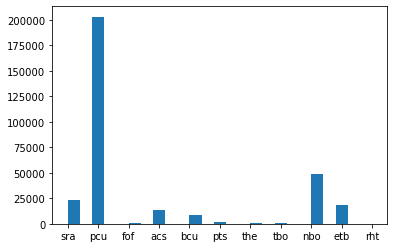

In [7]:
# topology is checked for all the data points and it is seen that pcu type topology MOfs are seen in dataset mostly.
plt.hist(df1.iloc[:,-1], bins = 25)

## CASE 1: Selection of input parameters based on output CO2/N2 selectivity

In [8]:
# It is seen that the first 150000 data points is a good analysis for the data. However rest of the data need to be refined 
# Therefore first 150000 data points need to be tested only
#Firstly, Selection of input parameter need to be done based on output CO2/N2 selectivity
df4 = df1.iloc[:150000,:]
#df4.head()
df4.columns

Index(['MOFname', 'CO2_uptake_P0.15bar_T298K [mmol/g]',
       'CO2_uptake_error_P0.15bar_T298K [mmol/g]',
       'heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
       'heat_adsorption_error_CO2_P0.15bar_T298K [kcal/mol]',
       'excess_CO2_uptake_P0.15bar_T298K [mmol/g]',
       'CO2_uptake_P0.10bar_T363K [mmol/g]',
       'CO2_uptake_error_P0.10bar_T363K [mmol/g]',
       'heat_adsorption_CO2_P0.10bar_T363K [kcal/mol]',
       'heat_adsorption_error_CO2_P0.10bar_T363K [kcal/mol]',
       'excess_CO2_uptake_P0.10bar_T363K [mmol/g]',
       'CO2_uptake_P0.70bar_T413K [mmol/g]',
       'CO2_uptake_error_P0.70bar_T413K [mmol/g]',
       'heat_adsorption_CO2_P0.70bar_T413K [kcal/mol]',
       'heat_adsorption_error_CO2_P0.70bar_T413K [kcal/mol]',
       'excess_CO2_uptake_P0.70bar_T413K [mmol/g]',
       'working_capacity_vacuum_swing [mmol/g]',
       'working_capacity_temperature_swing [mmol/g]',
       'CO2_binary_uptake_P0.15bar_T298K [mmol/g]',
       'CO2_binary_uptake_error_P0.1

(array([1.6399e+04, 0.0000e+00, 1.0057e+05, 0.0000e+00, 1.2390e+03,
        0.0000e+00, 1.1238e+04, 0.0000e+00, 6.1280e+03, 0.0000e+00,
        3.6400e+02, 0.0000e+00, 2.0800e+02, 0.0000e+00, 1.0100e+02,
        0.0000e+00, 4.1700e+03, 0.0000e+00, 9.5700e+03, 1.3000e+01]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <a list of 20 Patch objects>)

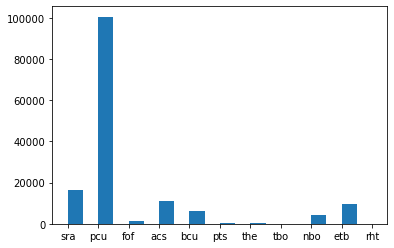

In [9]:
plt.hist(df4.iloc[:,-1], bins = 20)

<b> 3 parameters are constructed based on the output variables i.e. Co2/N2 selectivity and working capacity 

1. based on CO2, heat adsorption ,N2 binary uptake and heat adsorption parameter vs Co2/N2 selectivity
2. based on parameters which influences goodness of fit for the Working capacity 

<b>Starting with the Analysis1 of the variables with 
    1. Correlation analysis of each variable with CO2/N2 selectivity then 
    2. Cluster plotting of all parameters wrt CO2/N2 selectivity to find possible outlier and any correlation between parameters
    3. Finally, Linear regression between the best parameters to see the goodness of fit

In [10]:
parameter1 = ['CO2_uptake_P0.15bar_T298K [mmol/g]','heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]',
             'CO2_binary_uptake_P0.15bar_T298K [mmol/g]','heat_adsorption_CO2_binary_P0.15bar_T298K [kcal/mol]',  
              'N2_binary_uptake_P0.85bar_T298K [mmol/g]','heat_adsorption_N2_binary_P0.85bar_T298K [kcal/mol]',
              'CO2/N2_selectivity']
analysis1 = df4[parameter1]
analysis1.head()


,CO2_uptake_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_binary_uptake_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_binary_P0.15bar_T298K [kcal/mol],N2_binary_uptake_P0.85bar_T298K [mmol/g],heat_adsorption_N2_binary_P0.85bar_T298K [kcal/mol],CO2/N2_selectivity
0,5.955197,9.223227,5.220817,9.057156,0.240941,4.978045,109.786792
1,5.715251,8.391884,5.286735,9.167069,0.211381,5.487318,126.719639
2,5.524486,8.674098,5.428172,7.547253,0.194073,4.474539,141.713366
3,5.517258,10.791553,4.797166,9.854624,0.088480,5.051593,274.702092
4,5.451593,8.711414,5.323548,9.274585,0.264817,4.881124,101.853896


In [11]:
# testing the correlation between the variables of parameter1 w.r.t CO2/N2 selectivity.
corr1, _ = pearsonr(analysis1.iloc[:,0],analysis1.iloc[:,-1])
print('Correlation of CO2 uptake & CO2/N2 selectivity: %.3f' %corr1)
#Good correlation between the variables
# Good consideration of input parameter and considered for the linear model

Correlation of CO2 uptake & CO2/N2 selectivity: 0.710


In [12]:
# 2nd variable wrt to the CO2/N2 selectivity
corr2, _ = pearsonr(analysis1.iloc[:,1],analysis1.iloc[:,-1])
print('Correlation of heat adsorption & CO2/N2 selectivity: %.3f' %corr2)

#Good correlation and can be considered for the linear model

Correlation of heat adsorption & CO2/N2 selectivity: 0.770


In [13]:
#3rd variable
corr3, _ = pearsonr(analysis1.iloc[:,2],analysis1.iloc[:,-1])
print('Correlation of CO2 binary uptake & CO2/N2 selectivity: %.3f' %corr3)

Correlation of CO2 binary uptake & CO2/N2 selectivity: 0.708


In [14]:
#4th variable
corr4, _ = pearsonr(analysis1.iloc[:,3],analysis1.iloc[:,-1])
print('Correlation of Heat adsorption CO2 binary uptake & CO2/N2 selectivity: %.3f' %corr4)

Correlation of Heat adsorption CO2 binary uptake & CO2/N2 selectivity: 0.770


In [15]:
#5th variable
corr5, _ = pearsonr(analysis1.iloc[:,4],analysis1.iloc[:,-1])
print('Correlation of N2 binary uptake & CO2/N2 selectivity: %.3f' %corr5)
# it is also shows a good negative correlation between the varaibles, hence all varaible is a good prediction of CO2/N2 selectivity

Correlation of N2 binary uptake & CO2/N2 selectivity: -0.453


In [16]:
#6th variable
corr6, _ = pearsonr(analysis1.iloc[:,5],analysis1.iloc[:,-1])
print('Correlation of N2 heat adsorpton binary uptake & CO2/N2 selectivity: %.3f' %corr6)

#This variable is also shows good correlation between the variables.

Correlation of N2 heat adsorpton binary uptake & CO2/N2 selectivity: 0.726


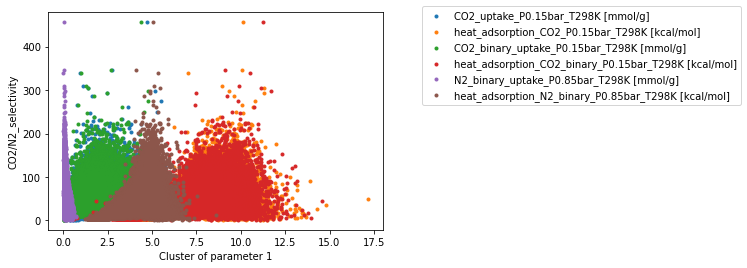

In [17]:
# Now making the linear model to find the goodness of fit with the parameter1, we consider output to be CO2/N2 selectivity
# lets see the distribution of each variable wrt to the CO2/N2 selectivity
for i in parameter1:
    if i != 'CO2/N2_selectivity': 
       
       plt.scatter(analysis1[i],analysis1['CO2/N2_selectivity'],marker='.',label =i)
       plt.xlabel('Cluster of parameter 1')
       plt.ylabel('CO2/N2_selectivity')
       plt.legend(bbox_to_anchor=(1.1, 1.05)
                 )
plt.show()

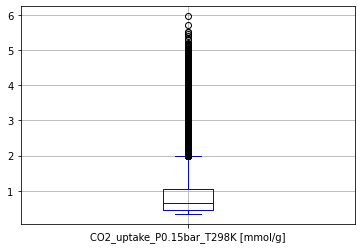

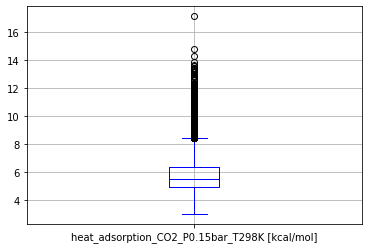

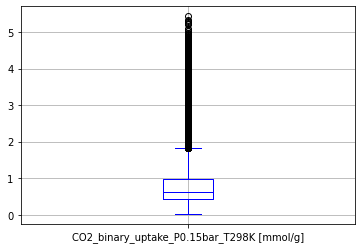

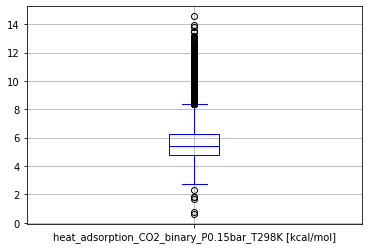

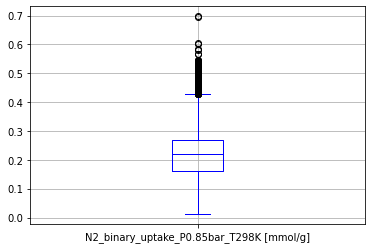

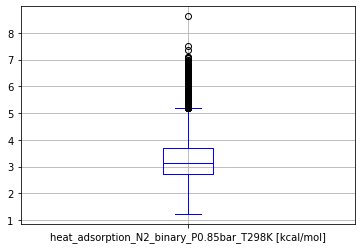

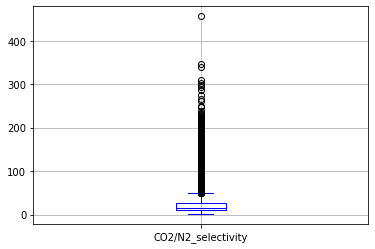

In [18]:
# Box plot shows the range of the parameters
for column in analysis1:
    plt.figure()
    analysis1.boxplot([column],color = 'blue')

# Applying linear regression between the 6 variables and the Co2/N2 selectivity

In [19]:
x = np.array(analysis1.iloc[:,:-1])
mean = np.mean(x,axis =0)
std = np.std(x,axis = 0)
x_standarized = (x - mean)/std

In [20]:
y = np.array(analysis1.iloc[:,-1])
y_mean = np.mean(y,axis =0)
y_std = np.std(y,axis =0)
y_standarized = (y-y_mean)/y_std

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x_standarized,y_standarized, test_size = 0.2,random_state  =42)

In [22]:
print('Shape of training: ', x_train.shape)
print('Shape of testing: ', x_test.shape)
print(x_train)
print('Shape of training: ', y_train.shape)
print('Shape of testing: ', y_test.shape)
print(y_train)

Shape of training:  (120000, 6)
Shape of testing:  (30000, 6)
[[-0.63133303 -0.61514374 -0.53902872 -0.92703033  0.33278626 -0.3653584 ]
 [ 2.41038699  0.68872285  2.70000725  0.43602059  1.7618409   0.32795902]
 [-0.38140433 -0.11717026 -0.4184247  -0.3116525   0.06318769  0.41921741]
 ...
 [-0.78855285 -0.97797019 -0.76616994 -0.99693957 -0.19002563 -1.13239874]
 [-0.85323802 -1.25047323 -0.84182474 -1.43741358  0.14382388 -1.2694321 ]
 [-0.73893563 -0.72442441 -0.93109987 -0.87586113 -0.76460002 -1.03014866]]
Shape of training:  (120000,)
Shape of testing:  (30000,)
[-0.57445097  0.58334072 -0.44757199 ... -0.63035533 -0.73086708
 -0.64773817]


In [23]:
from sklearn import linear_model
model =linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
# results based on the 
print('Prediction of CO2/N2 selectivity :',model.predict(x_test))
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, model.predict(x_test)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, model.predict(x_test)))
print('Intercept: \n', model.intercept_)


Prediction of CO2/N2 selectivity : [-0.4165314   1.22230238 -1.4982159  ... -0.87502151  0.2724742
 -0.63715749]
Coefficients: 
 [-0.1211619   0.15431507  0.76577869  0.16719703 -0.43697771 -0.12287444]
Mean squared error: 0.19
Coefficient of determination: 0.81
Intercept: 
 -0.00032516010429262305


Text(0.5, 1.0, 'Relationship between Predicted values and Actual values')

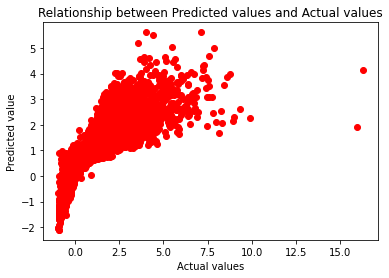

In [27]:
#plot of predicted value and actual values
plt.scatter(y_test,model.predict(x_test), color = 'red')
plt.xlabel("Actual values")
plt.ylabel('Predicted value')
plt.title('Relationship between Predicted values and Actual values')

In [28]:
# the regression results is as follows: showing high F-statistics and R2 value
import statsmodels.api as sm
from scipy import stats


X = x_standarized
y = y_standarized

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                 1.081e+05
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        19:50:05   Log-Likelihood:                -87418.
No. Observations:              150000   AIC:                         1.748e+05
Df Residuals:                  149993   BIC:                         1.749e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.117e-17      0.001   4.57e-14      1.0

In [29]:
analysis1.describe()

,CO2_uptake_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],CO2_binary_uptake_P0.15bar_T298K [mmol/g],heat_adsorption_CO2_binary_P0.15bar_T298K [kcal/mol],N2_binary_uptake_P0.85bar_T298K [mmol/g],heat_adsorption_N2_binary_P0.85bar_T298K [kcal/mol],CO2/N2_selectivity
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.870037,5.754194,0.809848,5.663604,0.216189,3.276705,22.115582
std,0.608380,1.180185,0.559900,1.212648,0.075190,0.764853,19.921684
min,0.343606,2.994905,0.021773,0.618764,0.012472,1.228254,1.337830
25%,0.452999,4.898167,0.434112,4.809074,0.163072,2.714913,10.318983
50%,0.642780,5.489069,0.613749,5.392500,0.221193,3.120803,15.339531
75%,1.063025,6.328065,0.991811,6.240447,0.269489,3.708677,25.768522
max,5.955197,17.155375,5.428172,14.563090,0.697106,8.622116,456.298648


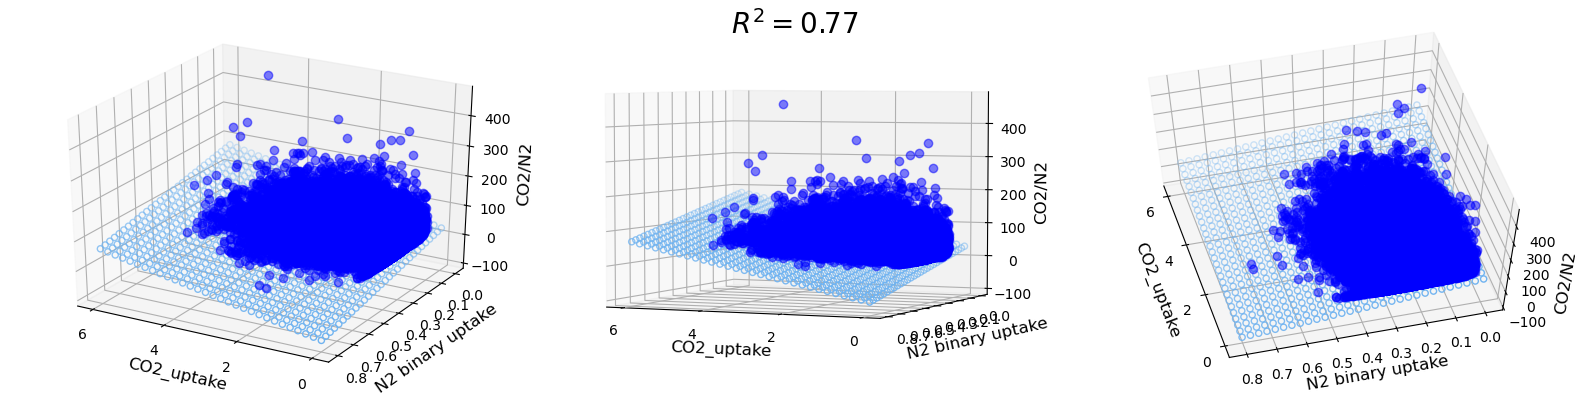

In [30]:
#Selecting the 3 strong parameters i.e., which influences each other are 
# 1.  CO2 uptake  2. N2 binary uptake 3. CO2/N2 selectivity

from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

X = analysis1[['CO2_uptake_P0.15bar_T298K [mmol/g]', 'N2_binary_uptake_P0.85bar_T298K [mmol/g]']].values.reshape(-1,2)
Y = analysis1['CO2/N2_selectivity']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 6, 30)   
y_pred = np.linspace(0, 0.8, 30) 
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='blue', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('CO2_uptake', fontsize=12)
    ax.set_ylabel('N2 binary uptake', fontsize=12)
    ax.set_zlabel('CO2/N2', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')



ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [42]:
x = np.array(analysis1.iloc[:,[0,4]])
mean = np.mean(x,axis =0)
std = np.std(x,axis = 0)
x_stand = (x - mean)/std

y = np.array(analysis1.iloc[:,-1])
y_mean = np.mean(y,axis =0)
y_std = np.std(y,axis =0)
y_stand = (y-y_mean)/y_std

from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(x_stand,y_stand, test_size = 0.33,random_state  =42)
print(print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, model.predict(X_test))))

Mean squared error: 0.06
None


In [40]:
kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()


model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1], ), kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(32, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
model.add(Dense(1, kernel_initializer=kernel_init, bias_initializer=bias_init))

# DEFINITION OF THE OPTIMIZER

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # Adam optimiser
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


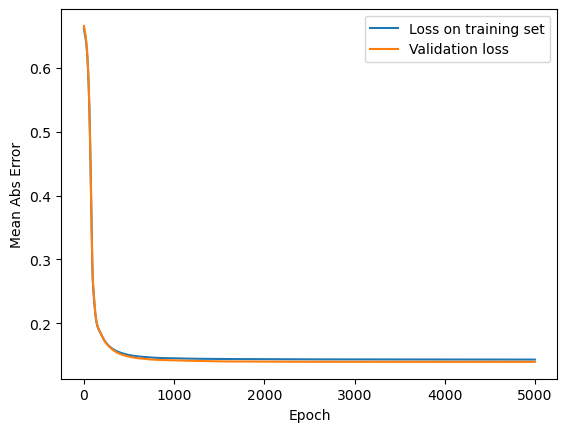

In [41]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 5000 # Number of EPOCHS

history = model.fit(X_train, Y_train, batch_size=X_train.shape[0], 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.1, callbacks=[PrintEpNum()])




plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['loss']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_loss']),label = 'Validation loss')
plt.legend()
plt.show()

## Conclusion: 

Based on above analysis, we can say that the parameter1 is a good parameter for the prediction of Co2/N2 selectivity.
From the above observation, it can be concluded that based on 

1.) only 6 parameters are appropriate for the making the prediction for the CO2/N2 selectivity data.

2.) We see that distribution of 6 parameters wrt to the CO2/N2 selectivity from scatter and box plot.

3.) Regression analysis is done and shows 81% goodness of fit and MSE a 0.19 

4.) MUltidimensional Plotting is done for the 3 best parameters which has goodness of fit of 77% and MSE as 0.06. Multidimensional plot shows the parameters at a particular MOFs shows CO2_uptake and N2_binary uptake capacity which correlates to the Co2/N2 selectivity. Hence for prediction of appropriate CO2/N2 selectivity based on the CO2_uptake and N2_binary uptake capacity of the model

5.) Last neural network shows how training loss decreases for the dataset.
